In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import h5py
import pandas as pd

# Problem statement

We have pictures containing hand signs of the number 1 to 5. We want to build a neural network model that can effectively recognize 1 to 5 hand digits.

# Load the dataset

In [2]:
def load_signs_dataset():
    train_dataset = h5py.File('datasets/train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

# Model

In [3]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_signs_dataset()

# Training example

y = 2


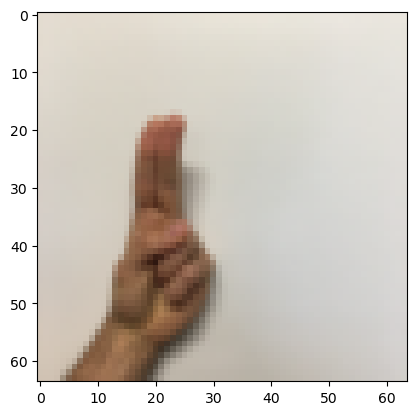

In [4]:
# Example of an image from the dataset
index = 10
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

# Pre-process the data

In [5]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("\nX_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120

X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


# CNN model using Functional API

In [6]:
# GRADED FUNCTION: convolutional_model

def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    
    Note that for simplicity and grading purposes, you'll hard-code some values
    such as the stride and kernel (filter) sizes. 
    Normally, functions should take these values as function parameters.
    
    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process) 
    """

    input_img = tf.keras.Input(shape=input_shape)
    
    ## CONV2D: 8 filters 4x4, stride of 1, padding 'SAME'
    Z1 = tf.keras.layers.Conv2D(filters=8, kernel_size=(4,4), strides=(1, 1), padding='same')(input_img)
    
    ## RELU
    A1 = tf.keras.layers.ReLU()(Z1)
    
    ## MAXPOOL: window 8x8, stride 8, padding 'SAME'
    P1 = tf.keras.layers.MaxPool2D(pool_size=(8, 8), strides=(8,8), padding = 'same')(A1)
    
    ## CONV2D: 16 filters 2x2, stride 1, padding 'SAME'
    Z2 = tf.keras.layers.Conv2D(filters=16, kernel_size=(2, 2), strides=(1, 1), padding='same')(P1)
    
    ## RELU
    A2 = tf.keras.layers.ReLU()(Z2)
    
    ## MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P2 = tf.keras.layers.MaxPool2D(pool_size=(4, 4), strides=(4,4), padding='same')(A2)
    
    ## FLATTEN
    F = tf.keras.layers.Flatten()(P2)
    
    ## Dense layer
    ## 6 neurons in output layer. Hint: one of the arguments should be "activation='softmax'" 
    outputs = tf.keras.layers.Dense(6, activation='softmax')(F)
    
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model


conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 8)         392       
                                                                 
 re_lu (ReLU)                (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 8)          0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 re_lu_1 (ReLU)              (None, 8, 8, 16)          0         
                                                             

# Train the model

In [7]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)

history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
17/17 [==============================] - 2s 55ms/step - loss: 1.7991 - accuracy: 0.1861 - val_loss: 1.7869 - val_accuracy: 0.1667
Epoch 2/100
17/17 [==============================] - 1s 62ms/step - loss: 1.7859 - accuracy: 0.2148 - val_loss: 1.7793 - val_accuracy: 0.2333
Epoch 3/100
17/17 [==============================] - 1s 61ms/step - loss: 1.7799 - accuracy: 0.2296 - val_loss: 1.7722 - val_accuracy: 0.2750
Epoch 4/100
17/17 [==============================] - 1s 61ms/step - loss: 1.7736 - accuracy: 0.2926 - val_loss: 1.7667 - val_accuracy: 0.2417
Epoch 5/100
17/17 [==============================] - 1s 55ms/step - loss: 1.7673 - accuracy: 0.3213 - val_loss: 1.7579 - val_accuracy: 0.3250
Epoch 6/100
17/17 [==============================] - 1s 51ms/step - loss: 1.7596 - accuracy: 0.3509 - val_loss: 1.7489 - val_accuracy: 0.3167
Epoch 7/100
17/17 [==============================] - 1s 59ms/step - loss: 1.7497 - accuracy: 0.3648 - val_loss: 1.7358 - val_accuracy: 0.3250
Epoch 

17/17 [==============================] - 1s 57ms/step - loss: 0.6091 - accuracy: 0.7981 - val_loss: 0.6392 - val_accuracy: 0.8167
Epoch 59/100
17/17 [==============================] - 1s 48ms/step - loss: 0.6008 - accuracy: 0.8046 - val_loss: 0.6325 - val_accuracy: 0.8167
Epoch 60/100
17/17 [==============================] - 1s 51ms/step - loss: 0.5929 - accuracy: 0.8046 - val_loss: 0.6263 - val_accuracy: 0.8167
Epoch 61/100
17/17 [==============================] - 1s 57ms/step - loss: 0.5859 - accuracy: 0.8111 - val_loss: 0.6194 - val_accuracy: 0.8167
Epoch 62/100
17/17 [==============================] - 1s 50ms/step - loss: 0.5781 - accuracy: 0.8157 - val_loss: 0.6140 - val_accuracy: 0.8250
Epoch 63/100
17/17 [==============================] - 1s 51ms/step - loss: 0.5711 - accuracy: 0.8157 - val_loss: 0.6081 - val_accuracy: 0.8250
Epoch 64/100
17/17 [==============================] - 1s 52ms/step - loss: 0.5636 - accuracy: 0.8176 - val_loss: 0.6037 - val_accuracy: 0.8250
Epoch 65/100

# Model evaluation

C:\Users\tonba\AppData\Local\Temp\ipykernel_21824\267888566.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
C:\Users\tonba\AppData\Local\Temp\ipykernel_21824\267888566.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

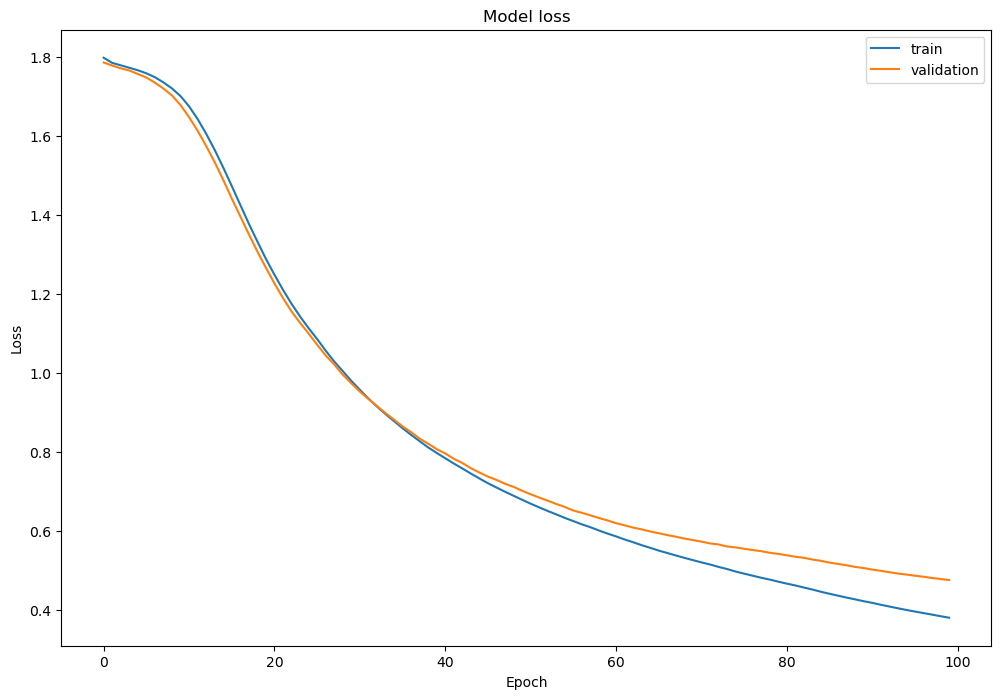

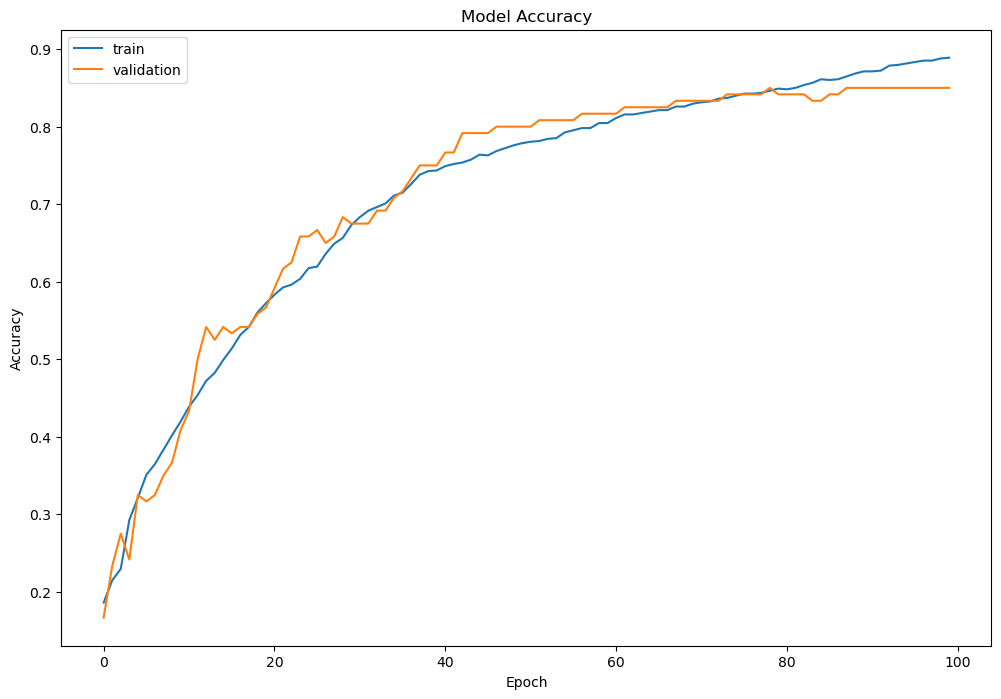

In [8]:
# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on. 

df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')